# Singapore Housing Price Prediction

## Contents

#### In this notebook '01_Data_Cleaning_EDA' :
- [Background](#Background)
- [Problem Statement](#Problem-Statement)
- [Data Cleaning & EDA](#Data-Import-and-EDA)

#### In the next notebook '02_Modeling_Conclusions' :
- Preprocessing
- Modeling
- Model Evaluation
- Prediction
- Conclusions and Recommendations
- References

## Background

The Housing & Development Board (HDB) was set up on 1 February 1960, taking over from the Singapore Improvement Trust (SIT) which was set up by the British colonial government in 1927.

The main task of the HDB was to house the nation. From just 9% of people living in government flats in 1960, HDB flats today house over 80% of Singapore’s population. ([Source](https://dollarsandsense.sg/5-types-hdb-flats-not-longer-built-singapore/))

Many of the HDB flat owners purchase resale flats from the market instead of applying for new flats due to a number of constraints. In view of that, a good housing price prediction model provides a valuable tool for real estate agents, investors, and home buyers, providing insights into the current state of the housing market and helping to inform investment decisions.

For example, The "Singapore's Smarter Property Search" page [99.co](https://www.99.co/) released an instant property value calculation tool for their users:

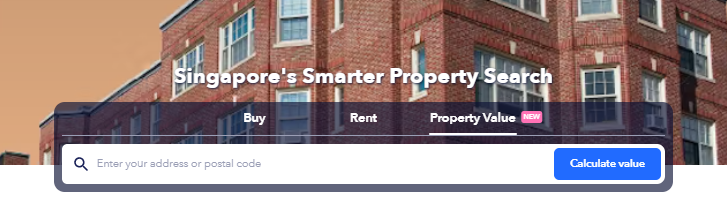

This housing price prediction project aims to simulate an accurate and reliable model just like the one used by [99.co](https://www.99.co/) for valuation of a HDB resale flat. 

Linear Regression is used as it is an effective model to establish relationship between the resale price variable from explanatory variables associated with it. ([Source](https://www.knowledgehut.com/blog/data-science/linear-regression-for-machine-learning)) The model is trained using transaction data from 2012 to 2020 and will be evaluated using RMSE as the primary metric. 

## Problem Statement

The objective of the study is two folds:

- First, to create a prediction model that accurately predict house price with reasonable error margin.
- Second, to ensure that the model generalized well to perform equally well on the data points that it never sees before.

Aside, I hope to help realters and investors to understand which feature(s) are more crucial to determine the HDB resale price in Singapore.

#### The problem is approached with the following steps:

## 1. Data Cleaning

In [2]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shapefile as shp

In [3]:
import plotly.express as px

#### Import Data:

In [4]:
# read train and predict data in the datasets
df = pd.read_csv('../datasets/train.csv', low_memory=False)
df_pred = pd.read_csv('../datasets/test.csv', low_memory=False)

In [5]:
# look at the shape and types of the train data:
df.shape

(150634, 77)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [7]:
# look at the shape and types of the predict data:
df_pred.shape

(16737, 76)

In [8]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 76 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         16737 non-null  int64  
 1   Tranc_YearMonth            16737 non-null  object 
 2   town                       16737 non-null  object 
 3   flat_type                  16737 non-null  object 
 4   block                      16737 non-null  object 
 5   street_name                16737 non-null  object 
 6   storey_range               16737 non-null  object 
 7   floor_area_sqm             16737 non-null  float64
 8   flat_model                 16737 non-null  object 
 9   lease_commence_date        16737 non-null  int64  
 10  Tranc_Year                 16737 non-null  int64  
 11  Tranc_Month                16737 non-null  int64  
 12  mid_storey                 16737 non-null  int64  
 13  lower                      16737 non-null  int

In [9]:
# check the headers and values:
pd.set_option('display.max_columns', None)
df.head(3)

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013


In [10]:
df_pred.head(3)

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,114982,2012-11,YISHUN,4 ROOM,173,YISHUN AVE 7,07 TO 09,84.0,Simplified,1987,2012,11,8,7,9,8,4 ROOM Simplified,"173, YISHUN AVE 7",904.176,34,12,1986,Y,Y,N,N,N,132,0,0,0,92,40,0,0,0,0,0,0,0,760173,1.437066,103.831121,Yishun,877.431572,NaN,2.0,4.0,687.576779,NaN,1.0,1.0,56,123,686.660434,Canberra,0,0,1.443077,103.829703,75.683952,Blk 174,1.437558,103.831591,426.467910,Ahmad Ibrahim Primary School,92,0,1.433681,103.832924,156.322353,Ahmad Ibrahim Secondary School,218,0,1.436235,103.829987
1,95653,2019-08,JURONG WEST,5 ROOM,986C,JURONG WEST ST 93,04 TO 06,112.0,Premium Apartment,2008,2019,8,5,4,6,5,5 ROOM Premium Apartment,"986C, JURONG WEST ST 93",1205.568,13,14,2002,Y,N,N,N,N,53,0,0,0,28,25,0,0,0,0,0,0,0,643986,1.336957,103.695668,Jurong West,534.037705,NaN,1.0,3.0,2122.346226,NaN,NaN,NaN,72,94,169.478175,Pioneer,0,0,1.337343,103.697143,88.993058,Blk 653B,1.336491,103.696319,439.756851,Jurong West Primary School,45,0,1.339244,103.698896,739.371688,Jurong West Secondary School,199,0,1.335256,103.702098
2,40303,2013-10,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,2013,10,8,7,9,8,3 ROOM New Generation,"534, ANG MO KIO AVE 10",731.952,41,12,1979,Y,N,N,N,N,218,0,0,191,22,1,1,0,0,0,0,3,0,560534,1.374058,103.854168,Ang Mo Kio,817.050453,NaN,2.0,3.0,152.287621,1.0,3.0,11.0,50,100,694.220448,Ang Mo Kio,1,0,1.369465,103.849939,86.303575,Blk 532,1.374255,103.854919,355.882207,Jing Shan Primary School,36,0,1.371893,103.851811,305.071191,Anderson Secondary School,245,0,1.374242,103.851430


#### Check for Missing Values:

Text(0.5, 1.0, 'Columns with Missing Values')

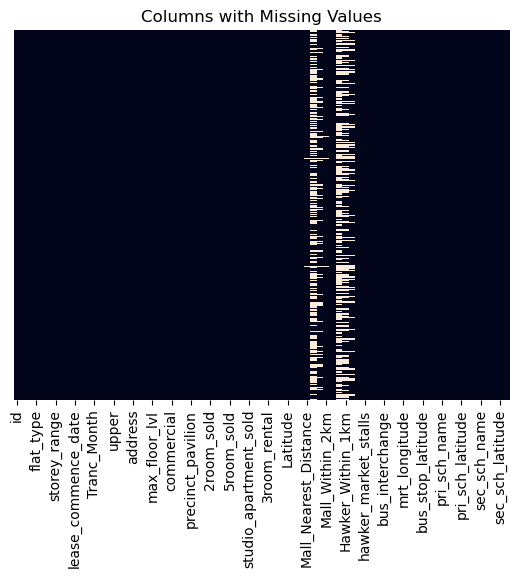

In [11]:
# plot a heatmap to visualise where the missing values sit with regards to the different columns:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)
plt.title('Columns with Missing Values')

Text(0.5, 1.0, 'Columns with Missing Values')

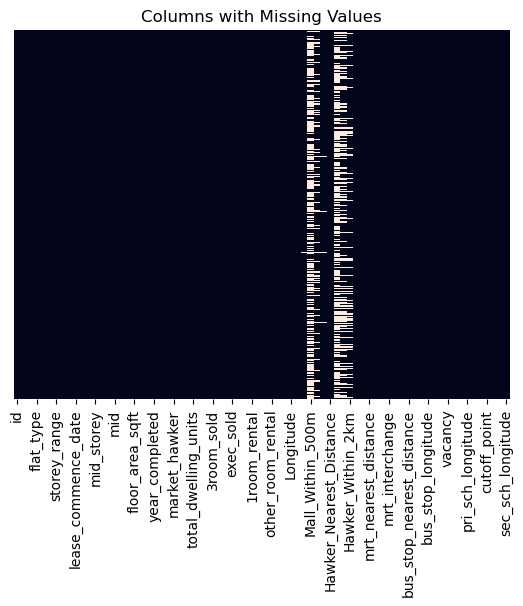

In [12]:
# plot the same heatmap for predict data to identify missing values as well:
sns.heatmap(df_pred.isnull(),yticklabels=False, cbar=False)
plt.title('Columns with Missing Values')

- From the heatmap, it is observed that the missing values for both train and predict data are concentrated within a few features related to the distance of flats to nearby amenities.
- The rest of the features are highly related to `Mall_Nearest_Distance` and can be deemed redundant due to multicollinearity. ([Source](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Multicollinearity%20occurs%20when%20two%20or,variable%20in%20a%20regression%20model.))
- It is considered safe to drop features like `Mall_Within_500m` `Mall_Within_1km` `Mall_Within_2km` even they do not contain a lot of missing values

#### Calculate the percentage of missing data for each column:

In [13]:
# construct a dataframe consisting percentage of missing values in each column to easier reference:
df_null = pd.DataFrame(data=df.isnull().sum(), columns=['null_count'])
df_null['null_percent'] = df_null['null_count'].map(lambda x: round((x/len(df))*100,1))

In [14]:
df_null.loc[df_null['null_percent']>0]

,null_count,null_percent
Mall_Nearest_Distance,829,0.6
Mall_Within_500m,92789,61.6
Mall_Within_1km,25426,16.9
Mall_Within_2km,1940,1.3
Hawker_Within_500m,97390,64.7
Hawker_Within_1km,60868,40.4
Hawker_Within_2km,29202,19.4


In [15]:
# for predict data, do the same to illustrate the percentage of missing values in each column:
df_pred_null = pd.DataFrame(data=df_pred.isnull().sum(), columns=['null_count'])
df_pred_null['null_percent'] = df_pred_null['null_count'].map(lambda x: round((x/len(df_pred))*100,1))

In [16]:
df_pred_null.loc[df_pred_null['null_percent']>0]

,null_count,null_percent
Mall_Nearest_Distance,84,0.5
Mall_Within_500m,10292,61.5
Mall_Within_1km,2786,16.6
Mall_Within_2km,213,1.3
Hawker_Within_500m,10755,64.3
Hawker_Within_1km,6729,40.2
Hawker_Within_2km,3254,19.4


- As discussed earlier, the impacted features are highly corelated. It looks okay to drop the rest and keep `Mall_Nearest_Distance`. Drop columns `Mall_Within_500m` `Mall_Within_1km` `Mall_Within_2km` `Hawker_Within_500m` `Hawker_Within_1km` `Hawker_Within_2km` for both train and predict data. 

#### Clean up the missing data for known and unknown datasets concurrently, to ensure the data formats are aligned.

In [17]:
df.drop(columns= ['Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km'], 
        axis=1, inplace=True)

In [18]:
df_pred.drop(columns= ['Mall_Within_500m', 'Mall_Within_1km', 'Mall_Within_2km', 'Hawker_Within_500m', 'Hawker_Within_1km', 'Hawker_Within_2km'],
             axis=1, inplace=True)

In [19]:
df_null.loc[df_null['null_percent']>0]

,null_count,null_percent
Mall_Nearest_Distance,829,0.6
Mall_Within_500m,92789,61.6
Mall_Within_1km,25426,16.9
Mall_Within_2km,1940,1.3
Hawker_Within_500m,97390,64.7
Hawker_Within_1km,60868,40.4
Hawker_Within_2km,29202,19.4


In [20]:
df_pred_null.loc[df_pred_null['null_percent']>0]

,null_count,null_percent
Mall_Nearest_Distance,84,0.5
Mall_Within_500m,10292,61.5
Mall_Within_1km,2786,16.6
Mall_Within_2km,213,1.3
Hawker_Within_500m,10755,64.3
Hawker_Within_1km,6729,40.2
Hawker_Within_2km,3254,19.4


- Now we are left with `Mall_Nearest_Distance` column that still contains a very low percentage of missing values.
- We hope not to drop the column `Mall_Nearest_Distance` as it looks more relavant in predicting the house price. 
- Let's look at the distribution of the values to identify the best way of imputation in this case.

Text(0.5, 1.0, 'Distribution of Distance to Nearest Mall')

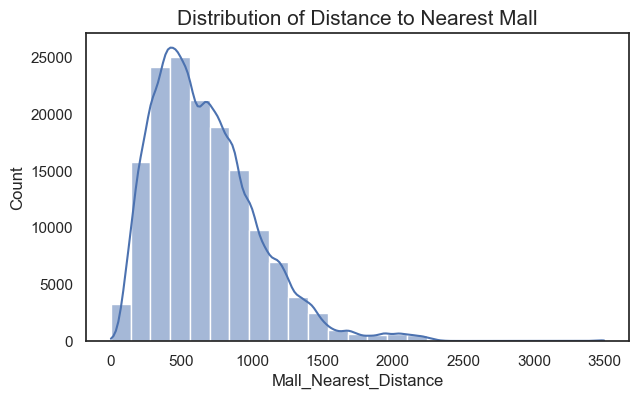

In [21]:
# plot a histogram to look at the distribution of values in Mall_Nearest_Distance feature:
plt.figure(figsize = (7, 4))
sns.set(style="white")
sns.histplot(data=df, x='Mall_Nearest_Distance', bins =25, kde=True)
plt.title('Distribution of Distance to Nearest Mall', fontsize=15)

- The distribution is skewed to the right. It is better to impute missing values using the median value instead of the mean. ([Source](https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#Impute_Replace_Missing_Values_with_Median))
- It's also important to always impute with values from the training set to avoid bias towards the validation/test data. ([Source](https://www.kaggle.com/general/226554))

In [22]:
# impute missing values in Mall_Nearest_Distance feature for train data:
df['Mall_Nearest_Distance'] = df['Mall_Nearest_Distance'].fillna(df['Mall_Nearest_Distance'].median())

In [23]:
# do the same for predict data:
df_pred['Mall_Nearest_Distance'] = df_pred['Mall_Nearest_Distance'].fillna(df['Mall_Nearest_Distance'].median())

In [24]:
# check for data shape again:
df.shape

(150634, 71)

In [25]:
df_pred.shape

(16737, 70)

## 2. EDA of Known Data

#### EDA: What is the distribution of HDB resale prices like in the given training data? Any outliers?

In [26]:
# summarise the distribution of the resale price data:
df['resale_price'].describe()

count    1.506340e+05
mean     4.491615e+05
std      1.433076e+05
min      1.500000e+05
25%      3.470000e+05
50%      4.200000e+05
75%      5.200000e+05
max      1.258000e+06
Name: resale_price, dtype: float64

Text(0.5, 1.0, 'Distribution of HDB Resale Price (2012-2021)')

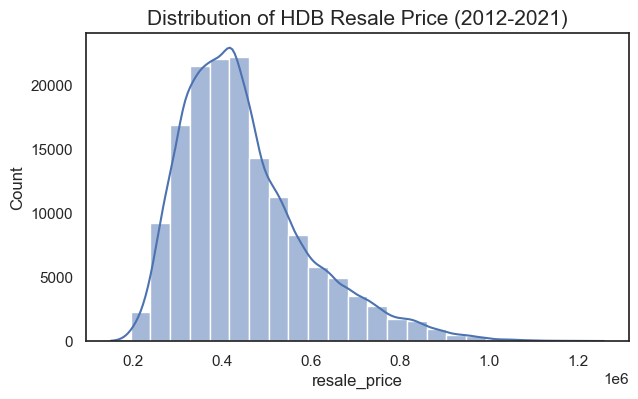

In [27]:
# visualise the price distribution using a histogram:
plt.figure(figsize = (7, 4))
sns.set(style="white")
sns.histplot(data=df, x='resale_price', bins =25, kde=True)
plt.title('Distribution of HDB Resale Price (2012-2021)', fontsize=15)

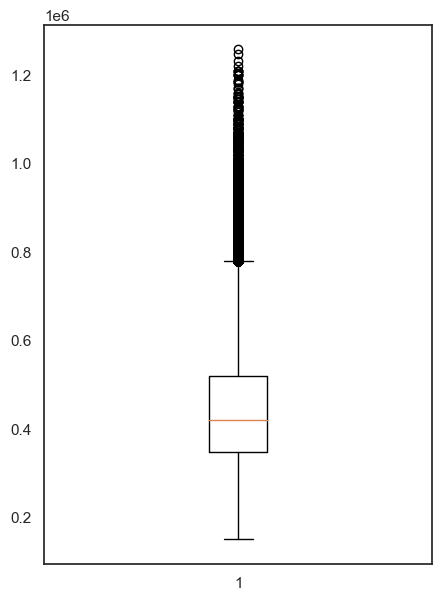

In [28]:
# a boxplot helps us understand the key value pointers like median, Q1, Q3 : 
plt.figure(figsize = (5,7))
bp = plt.boxplot(data=df, x='resale_price')

- The transaction prices of HDB resale flats range from 150k to 1.26mil. The avarage price is at 449k and most of the flats are sold within 800k. 
- Quite a number of outliers (higher than the whiskers range) are observed. Let's find out more about the outliers.

In [29]:
# fetch the 'whiskers' range (inter-quartile range) from the boxplot:
[item.get_ydata() for item in bp['whiskers']]

[array([347000., 150000.]), array([520000., 779000.])]

In [30]:
# find outliers with values higher than the range:
outliers = df.loc[df['resale_price'] > 779000]

In [31]:
# how many outliers?
outliers.shape

(5220, 71)

Text(0.5, 1.0, 'Outlier HDB Resale Flats (with price higher than $779k)')

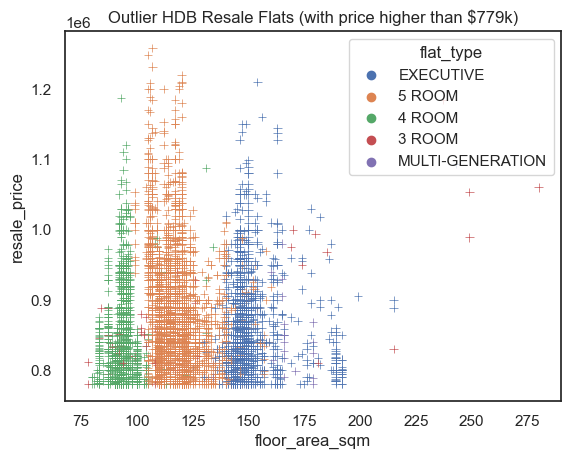

In [32]:
# identify the pattern in terms of 'flat type', 'floor area' in the outliers if any:
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=outliers, hue='flat_type', legend='brief', marker='+', label=None)
plt.title('Outlier HDB Resale Flats (with price higher than $779k)')

- It is observed that a large number of the outliers are bigger flats with floor area larger than 100sqm. Those with smaller floor areas could be within certain prime locations.
- Let's also discover more on the locations of outlier flats.

In [33]:
# find out where the outliers are located:
outliers.town.value_counts()

BUKIT MERAH        904
QUEENSTOWN         763
BISHAN             556
TOA PAYOH          554
CENTRAL AREA       372
KALLANG/WHAMPOA    370
ANG MO KIO         258
CLEMENTI           249
GEYLANG            179
MARINE PARADE      156
SERANGOON          148
BUKIT TIMAH        143
BEDOK              134
TAMPINES           130
HOUGANG            120
JURONG EAST         60
WOODLANDS           48
PASIR RIS           20
BUKIT BATOK         19
YISHUN              13
PUNGGOL             12
BUKIT PANJANG        7
CHOA CHU KANG        4
JURONG WEST          1
Name: town, dtype: int64

- Given the large number of outliers, and the reasonable value range (not going anything beyond and above 1.25mil), it makes better sense to keep the outliers. These values are important to account for a high variance of our training data, especially for transactional prices in a few prime locations.

In [34]:
# am also interested in finding out more about those high value HDB sold above $1mil:
above_1mil = df.loc[df['resale_price'] > 1000000]

In [35]:
# how many sold above 1mil?
above_1mil.shape

(273, 71)

Text(0.5, 1.0, 'Most Expensive HDB Flats (with price higher than $1mil)')

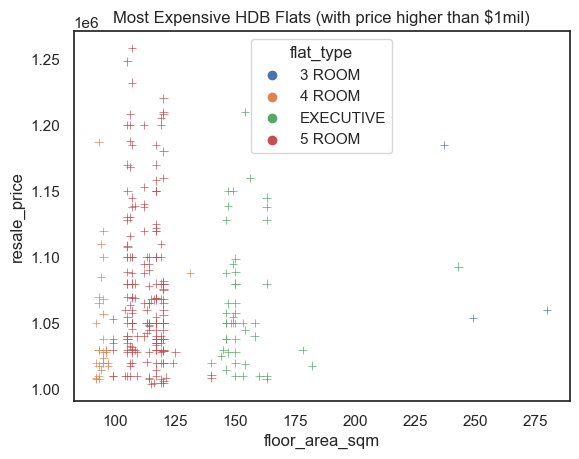

In [ ]:
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=above_1mil, hue='flat_type', legend='brief', marker='+', label=None)
plt.title('Most Expensive HDB Flats (with price higher than $1mil)')

- It is observed most of the flats sold above $1mil are bigger flats of floor area 100sqm and above. 
- They're all located in prime areas.

In [ ]:
# let's look at the locations of these high value HDB flats:
above_1mil.town.value_counts()

CENTRAL AREA       84
BISHAN             54
QUEENSTOWN         41
TOA PAYOH          30
KALLANG/WHAMPOA    21
BUKIT MERAH        21
BUKIT TIMAH        10
CLEMENTI            8
ANG MO KIO          2
GEYLANG             1
SERANGOON           1
Name: town, dtype: int64

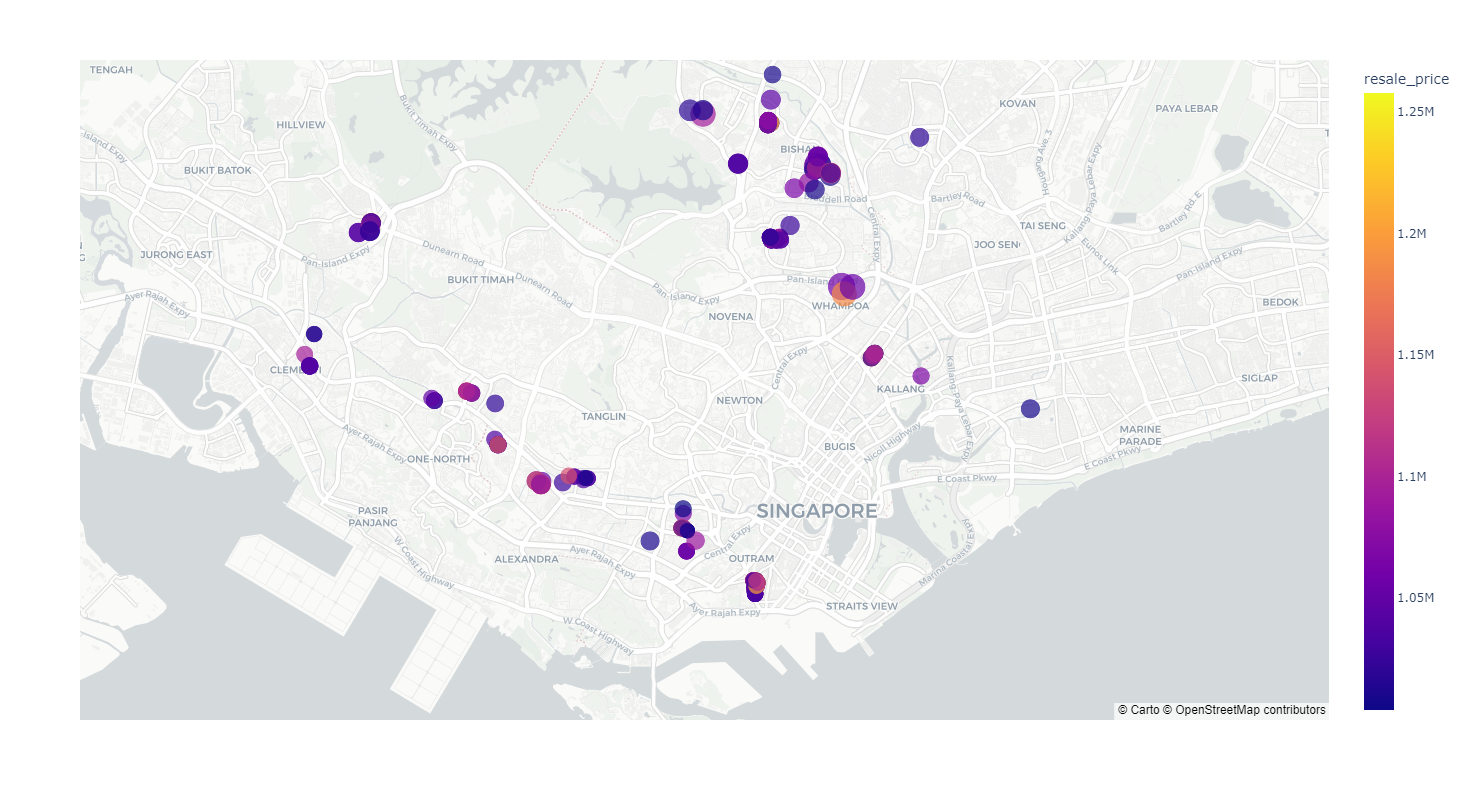

In [42]:
fig = px.scatter_mapbox(above_1mil, 
                        lat='Latitude', 
                        lon='Longitude', 
                        hover_name='town', 
                        hover_data=['town', 'resale_price'],
                        color='resale_price',
                        mapbox_style='carto-positron',
                        size='floor_area_sqm',
                        zoom=12, 
                        height=800,
                        width=1200)
fig.show()

- We notice from the map above that HDB with resale price above $1mil are mostly located in central and south area towns in Singapore.
- HDB's location seems to be an important factor impacting the resale price.

#### EDA: How do the HDB resale prices change over the years? 

In [43]:
count = df.groupby(['Tranc_Year']).count()
count = count.reset_index()

Text(0.5, 1.0, 'HDB Median Resale Price vs Transaction Volume')

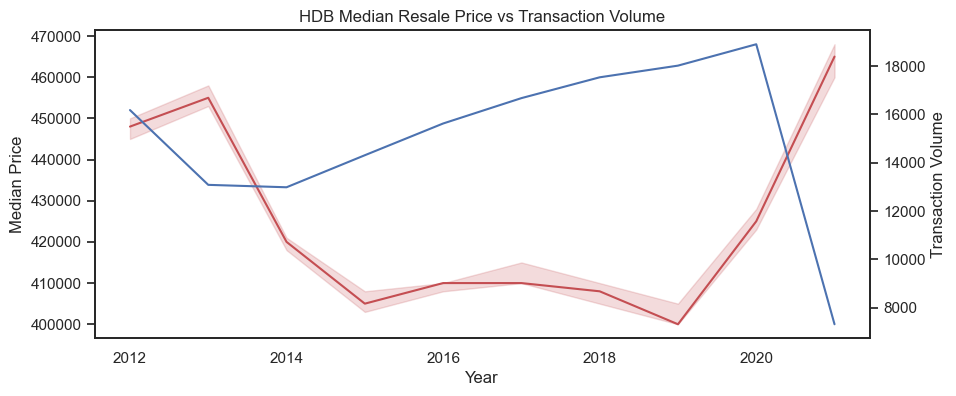

In [44]:
# plot a line chart to understand the median price and transaction volumns of prices over the years of study:
plt.figure(figsize = (10, 4))
median = sns.lineplot(x='Tranc_Year', y='resale_price', estimator='median', color='r', data=df).set(xlabel='Year', ylabel='Median Price')
ax2 = plt.twinx()
yr_count = sns.lineplot(x='Tranc_Year', y=count['id'], data=count).set(xlabel=None, ylabel='Transaction Volume')
plt.title('HDB Median Resale Price vs Transaction Volume')

- A sharp drop of price in 2013 is noticed. It was mainly due to the accumulated effects of the market curbs implemented by the government.. ([Source](https://www.homequarters.com.sg/2020/06/03/2013-the-fateful-year-that-caused-hdb-prices-to-plunge-10/))
- The continuous fall in price stopped in 2015 and remained relatively stable from 2015 to 2019. 
- HDB resale price climbed rapidly starting 2019 as the government allowed a more flexible use of CPF money for HDB purchase ([Source](https://www.straitstimes.com/singapore/housing/number-of-hdb-resale-flats-sold-in-q2-2019-grew-nearly-30)).
- The price went rocket high especially after the outbreak of COVID starting 2020.
- It is also observed that transaction volume is inversely related to the resale price, but with some delay. Corresponding to the price dip in 2013, the transaction volume only started to increase slowly one year later.

#### EDA: Resale Price by Flat Type

In [45]:
import joypy

Text(0.0, 1.0, 'HDB Resale Price by Flat Type')

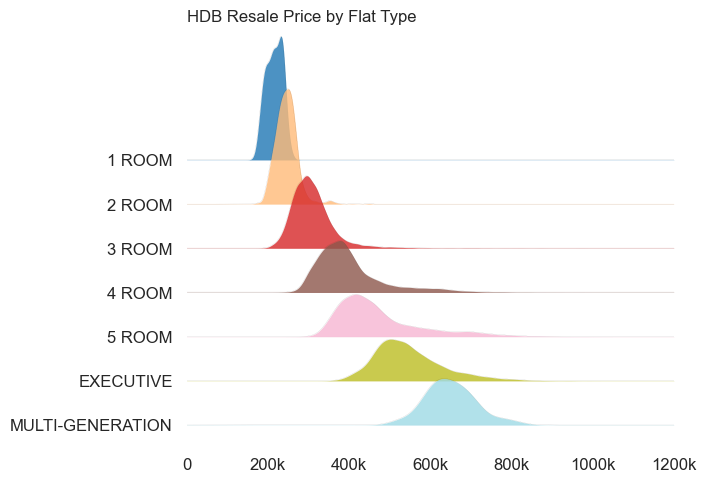

In [46]:
# use joypy to visualise the differences in HDB resale prices for different locations:
fig, axes = joypy.joyplot(df, by='flat_type', column='resale_price',figsize=(7,5),
             linewidth=0.05,overlap=1.3,alpha=0.8,colormap=plt.cm.get_cmap('tab20',7))
axes[-1].set_xlim([0,1200000])
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k','1400k']) 
plt.title('HDB Resale Price by Flat Type', loc='left')

- It is observed that resale price increases with the number of rooms.

#### EDA: Is it true *location* is all that matters?

In [47]:
# let's look at the median resale prices in different locations:
by_town = df.groupby(['town'])['resale_price'].median().reset_index()

Text(0.0, 1.0, 'HDB Resale Price by Town')

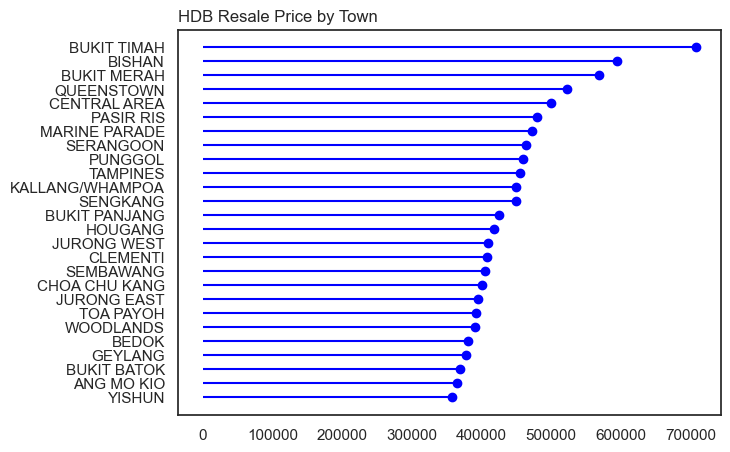

In [48]:
fig = plt.figure(figsize=(7,5))

ordered_price = by_town.sort_values(by='resale_price')
my_range=range(1,len(by_town.index)+1)
 
plt.hlines(y=my_range, xmin=0, xmax=ordered_price['resale_price'], color='blue')
plt.plot(ordered_price['resale_price'], my_range, 'o', color='blue')
 
plt.yticks(my_range, ordered_price['town'])
plt.title("HDB Resale Price by Town", loc='left')

- At one glance, it seems to indicate the resale price in Bukit Timah outperforms the other locations. 
- However, bear in mind the graph shows the median resale prices of all room types and all floor areas. It could be the case where all biggest flats sold are located in Bukit Timah.
- For a better understanding of the relationship between location and price, I will be looking into 4-room data only.

In [49]:
# slice the 4-room data for investigation:
df_4rm = df.loc[df['flat_type'] == '4 ROOM']

In [50]:
# create a pivot list of 4-room median price sorted by town:
by_town_4rm = df_4rm.groupby(['town'])['resale_price'].median().reset_index()

Text(0.0, 1.0, '4-ROOM HDB Median Resale Price by Town')

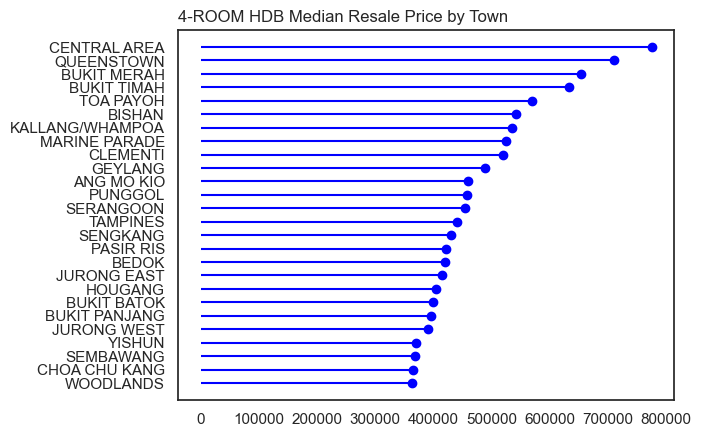

In [51]:
# sort the pivot list by price and plot the list for visualisation:

ordered_price_4rm = by_town_4rm.sort_values(by='resale_price')
my_range_4rm=range(1,len(by_town_4rm.index)+1)
 
plt.hlines(y=my_range_4rm, xmin=0, xmax=ordered_price_4rm['resale_price'], color='blue')
plt.plot(ordered_price_4rm['resale_price'], my_range_4rm, 'o',color='blue')
 
plt.yticks(my_range_4rm, ordered_price_4rm['town'])
plt.title("4-ROOM HDB Median Resale Price by Town", loc='left')

- We can see that for the same type of flat (4-room), Central Area is leading the price chart.

#### EDA: Resale Prices by Floor Area

In [52]:
# summarise the distribution of floor area:
df['floor_area_sqm'].describe()

count    150634.00000
mean         97.19763
std          24.40304
min          31.00000
25%          75.00000
50%          95.00000
75%         112.00000
max         280.00000
Name: floor_area_sqm, dtype: float64

Text(1.0, 1.0, 'HDB Resale Price by Floor Area in sqm')

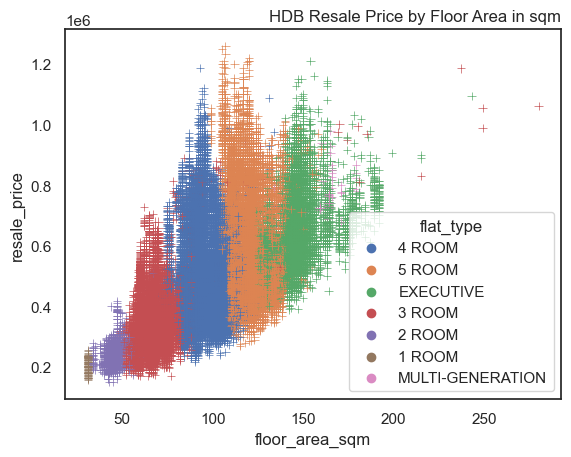

In [53]:
sns.scatterplot(x='floor_area_sqm', y='resale_price', data=df, hue='flat_type', legend='brief', marker='+', label=None)
plt.title("HDB Resale Price by Floor Area in sqm", loc='right')

- It is observed that HDB resale prices are higher for larger flats.

#### EDA: Resale Price by Storey

In [54]:
# create a pivot list of median resale price by storey range:
by_storey = df_4rm.groupby(['storey_range'])['resale_price'].median().reset_index()

In [55]:
# understand which are the values of storey range:
by_storey['storey_range'].unique()

array(['01 TO 03', '01 TO 05', '04 TO 06', '06 TO 10', '07 TO 09',
       '10 TO 12', '11 TO 15', '13 TO 15', '16 TO 18', '16 TO 20',
       '19 TO 21', '21 TO 25', '22 TO 24', '25 TO 27', '26 TO 30',
       '28 TO 30', '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40',
       '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51'],
      dtype=object)

- Notice that some of the range groups overlap each other. To better understand the linear relationship between price and storey, we will need to re-arrange the groups for data visualisation. 

Text(1.0, 1.0, 'HDB Median Resale Price by Storey')

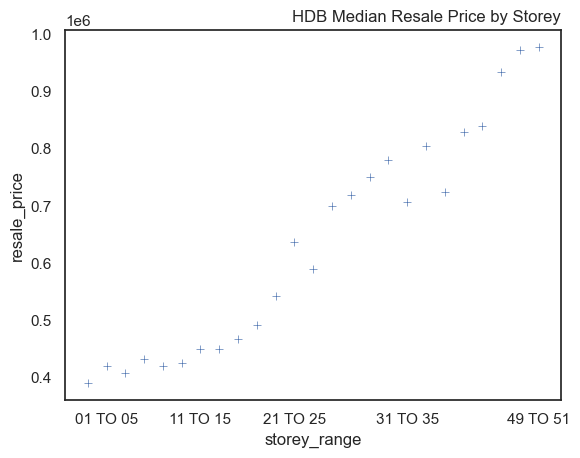

In [56]:
sns.scatterplot(x='storey_range', y='resale_price', data=by_storey, legend='brief', marker='+', label=None)

# as mentioned above, it is important to re-arrange the groups for visualisation:
plt.xticks(['01 TO 05', 
            '11 TO 15', 
            '21 TO 25',
            '31 TO 35', 
            '49 TO 51'])
plt.title("HDB Median Resale Price by Storey", loc='right')

- The graph shows a clear linear relationship between the median resale price and the storey.

#### EDA: Resale Prices by Model Type:

In [57]:
# create a pivot list of median resale price by model type and sort it in an ascending order:
by_model = df_4rm.groupby(['flat_model'])['resale_price'].median().sort_values().reset_index()

C:\Users\daphn\AppData\Local\Temp\ipykernel_3384\112763893.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, 'HDB Resale Price by Flat Model')

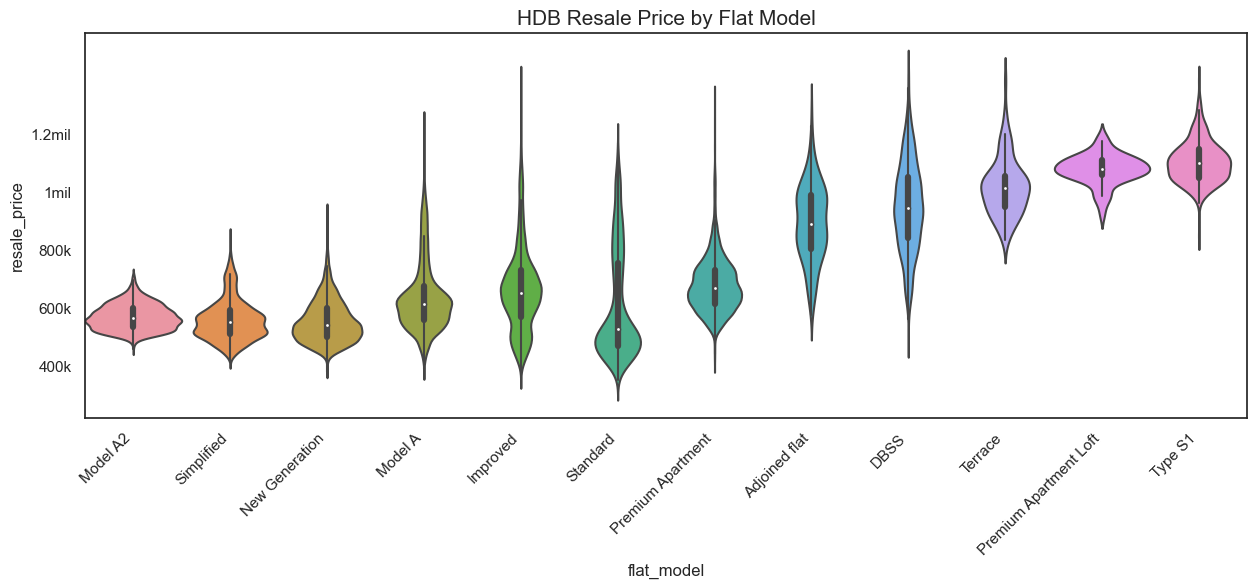

In [67]:
# a violin plot is used to visualise the distribution of each categorical data: 
plt.figure(figsize=(15,5))
fig = sns.violinplot(x='flat_model', y='resale_price', order = by_model['flat_model'], data=df, width=1)
fig.set_xticklabels(labels=by_model['flat_model'],rotation=45, ha='right')
fig.set_yticklabels(labels=['200k','400k','600k','800k','1mil','1.2mil'],rotation=0, ha='right')
plt.title('HDB Resale Price by Flat Model', fontsize=15)

- There is a visible variation of violins (in terms of price ranges and shapes) among different flat models. 
- However, as flat models can be a combination of other features, like HDB ages and floor areas, we will need to interpret the model carefully and understand which has more impact on the resale price.

#### EDA: Resale Price By Distance to Nearest Amenities

<AxesSubplot:xlabel='Mall_Nearest_Distance', ylabel='resale_price'>

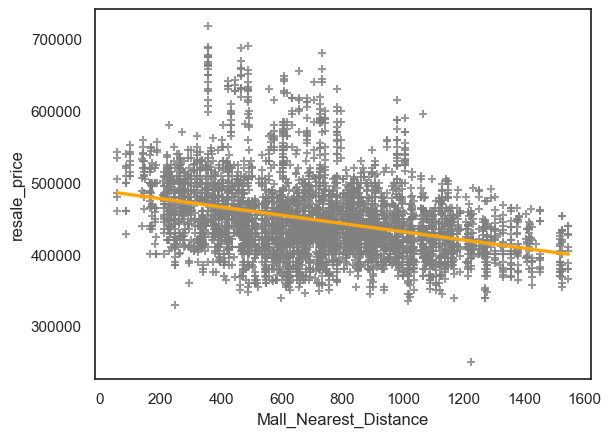

In [70]:
sns.regplot(x='Mall_Nearest_Distance', y='resale_price', data=df_4rm.loc[df_4rm['town']=='TAMPINES'], marker = '+', fit_reg =True, 
            scatter_kws={'color': 'grey'}, line_kws={'color': 'orange'}, label=None)

- In the selected location, the resale price is lower for those flats that are further away from amenities.

#### EDA: Resale Price By Type: Residential or Commercial

In [71]:
# how many flats in the train data are residential?
df['residential'].value_counts()

Y    150634
Name: residential, dtype: int64

In [72]:
# how many flats in the train data are residential as well as commercial?
df['commercial'].value_counts()

N    121815
Y     28819
Name: commercial, dtype: int64

In [73]:
# what is the percentage of flats that are both residential and commercial?
28819/150634

0.19131802913020965

- It is noticed that about 19% of the flats in the train data are both 'residential' and 'commercial' in nature. How does that impact the resale value of these flats?

<AxesSubplot:xlabel='resale_price', ylabel='commercial'>

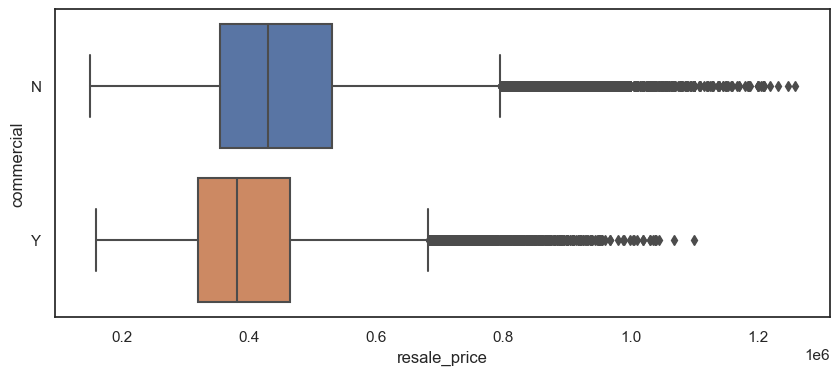

In [74]:
# use a boxplot to visualise the difference in price distributions between commercial and non-commercial flats:
plt.figure(figsize = (10,4))
sns.boxplot(data=df, y='commercial', x='resale_price')

In [75]:
# how old are the flats in overall?
df.hdb_age.mean()

28.551535509911442

In [76]:
# how old are the commercial flats?
commercial = df.loc[df['commercial'] == 'Y']
commercial.hdb_age.mean()

34.39349040563517

- Looks like the commercial flats are valued lower than the non-commercial ones. It could be due to the fact that HDB commercial flats are older in overall.

#### This is the end of the Data Cleaning and EDA Notebook. Let's save the date for preprocessing. 

In [77]:
# save the data for preprocessing
df.to_csv('../datasets/train_bf_preprocessing.csv')

In [78]:
df_pred.to_csv('../datasets/test_bf_preprocessing.csv')